# With Clipping

Removes unseen data points.

Look at the examples below.

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



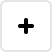
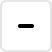
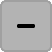
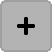
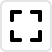
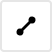
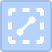

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.geo_data import *
LetsPlot.setup_html()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')

In [3]:
states = geocode('state', df.state.unique(), scope='US').get_boundaries(9)
states.head(2)

state found name                                           geometry
0    IL   Illinois  MULTIPOLYGON (((-89.00848 37.22158, -89.00574 ...
1    IN    Indiana  MULTIPOLYGON (((-86.07513 37.99400, -86.07788 ...

In [4]:
p = ggplot() + geom_map(data=states, tooltips=layer_tooltips().line('@{found name}'))
p1 = p + ggtitle('Default')
p2 = p + scale_x_continuous(limits=[-92, -82]) + ylim(36, 43) + ggtitle('Zoom With Clipping')

w, h = 400, 300
bunch = GGBunch()
bunch.add_plot(p1, 0, 0, w, h)
bunch.add_plot(p2, w, 0, w, h)
bunch